In [305]:
import numpy as np
import math as m 
import matplotlib.pyplot as plt


## Took the input of angles in degrees and gives out T matrix

In [69]:
theta1 = int(input("Enter the angle of the first axis"))
theta2 = int(input("Enter the angle of the 2nd axis"))
theta3 = int(input("Enter the angle of the 3rd axis"))
theta4 = int(input("Enter the angle of the 4th axis"))
theta5 = int(input("Enter the angle of the 5th axis"))


class Forward():
x_in = np.radians(theta1)
# First I will create a matrix that will serve as blueprint

_T1 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(-m.pi/2)*m.sin(m.pi/2+x_in), 0 ],[ m.sin(m.pi/2+x_in) , m.cos(-m.pi/2)*m.cos(m.pi/2+x_in), -m.sin(-m.pi/2)*m.cos(m.pi/2+x_in), 0 ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), 5 ],[ 0 , 0, 0, 1]])

IndentationError: expected an indented block after class definition on line 8 (2696812332.py, line 9)

In [271]:
# Implementing class/library for forward kinematics 
class Forward:
    
    def __init__(self, theta1, theta2, theta3, theta4, theta5):
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        
    # This is transformation from frame 1 to 0     
    def _0T1(self):
        x_in = np.radians(self.theta1)
        d1 = 1
        
        _T1 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(-m.pi/2)*m.sin(m.pi/2+x_in), 0 ],[ m.sin(m.pi/2+x_in) , m.cos(-m.pi/2)*m.cos(m.pi/2+x_in), -m.sin(-m.pi/2)*m.cos(m.pi/2+x_in), 0 ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d1 ],[ 0 , 0, 0, 1]])
        return _T1
    
    # This is transformation from frame 2 to 1    
    def _1T2(self):
        x_in = np.radians(self.theta2)
        a2 = 0.5
        
        _T2 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(0)*m.sin(m.pi/2+ x_in), m.sin(0)*m.sin(m.pi/2+x_in), a2*m.cos(m.pi/2) ],[ m.sin(m.pi/2+x_in) , m.cos(0)*m.cos(m.pi/2+x_in), -m.sin(0)*m.cos(m.pi/2+x_in), a2*m.sin(m.pi/2) ],[ 0 , m.sin(0), m.cos(0), 0 ],[ 0 , 0, 0, 1]]) 
        return _T2 
    
    # This is transformation from frame 3 to 2
    def _2T3(self):
        x_in = np.radians(self.theta3)
        a3= 1.5
        d3 = 0
        
        _T3 = np.array([[m.cos(-m.pi/2 + x_in ), -m.cos(m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(m.pi/2)*m.sin(m.pi/2+x_in), a3*m.cos(-m.pi/2) ],[ m.sin(-m.pi/2+x_in) , m.cos(m.pi/2)*m.cos(-m.pi/2+x_in), -m.sin(m.pi/2)*m.cos(-m.pi/2+x_in), 3*m.sin(-m.pi/2) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d3 ],[ 0 , 0, 0, 1]])
        return _T3
    
    # This is transformation from frame 4 to 3
    def _3T4(self):
        x_in = np.radians(self.theta4)
        d4 = 1.1
        
        _T4 = np.array([[m.cos( x_in ), -m.cos(-m.pi/2)*m.sin( x_in), m.sin(-m.pi/2)*m.sin(x_in), 0 ],[ m.sin(x_in) , m.cos(-m.pi/2)*m.cos(x_in), -m.sin(-m.pi/2)*m.cos(x_in), 0 ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d4 ],[ 0 , 0, 0, 1]])
        return _T4
    
    # This is transformation from frame 5 to 4
    def _4T5(self):
        x_in = np.radians(self.theta5)
        a5 = 2
        d5 = 0.8
        _T5 = np.array([[m.cos(-m.pi + x_in ), -m.cos(m.pi/2)*m.sin(-m.pi+ x_in), m.sin(m.pi/2)*m.sin(-m.pi +x_in), a5*m.cos(-m.pi) ],[ m.sin(-m.pi+x_in) , m.cos(m.pi/2)*m.cos(-m.pi+x_in), -m.sin(m.pi/2)*m.cos(-m.pi+x_in), a5*m.sin(-m.pi) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d5 ],[ 0 , 0, 0, 1]])
        return _T5
    
    # need to implement frame 6 which is the end effector frame 
    #def _end_effector(self):
        
        
        
    def _runall(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        
        return op4

    



In [294]:
# Instantiation of class 
test = Forward(0.1,3,0.3,3,0.5)

# Function to get final position of frame 5 based on forward kinematics 
test._runall()[:,3]

array([-0.69581598,  0.90711188, -0.63840632,  1.        ])

In [339]:
list = []
for i in range(90):
    test = Forward(i,i+1,i+ 2,i +3,i +4)

    list.insert(i-1,test._runall()[:,3])
    print('One step done next',i)

One step done next 0
One step done next 1
One step done next 2
One step done next 3
One step done next 4
One step done next 5
One step done next 6
One step done next 7
One step done next 8
One step done next 9
One step done next 10
One step done next 11
One step done next 12
One step done next 13
One step done next 14
One step done next 15
One step done next 16
One step done next 17
One step done next 18
One step done next 19
One step done next 20
One step done next 21
One step done next 22
One step done next 23
One step done next 24
One step done next 25
One step done next 26
One step done next 27
One step done next 28
One step done next 29
One step done next 30
One step done next 31
One step done next 32
One step done next 33
One step done next 34
One step done next 35
One step done next 36
One step done next 37
One step done next 38
One step done next 39
One step done next 40
One step done next 41
One step done next 42
One step done next 43
One step done next 44
One step done next 4

Text(0.5, 0, 'Z coordinate')

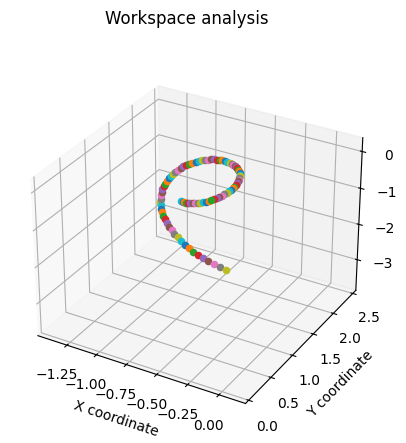

In [344]:
plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(0.1, 0.1, 0.1, 'blue')
for i in range(90):
    ax.scatter3D(list[i][0], list[i][1], list[i][2])


plt.suptitle('Workspace analysis')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
ax.set_zlabel('Z coordinate')


In [340]:
list

[array([-0.67544085,  0.96259981, -0.52578034,  1.        ]),
 array([-0.65605966,  0.94602309, -0.50553186,  1.        ]),
 array([-0.63624738,  0.93272085, -0.4848654 ,  1.        ]),
 array([-0.6161651 ,  0.92272317, -0.46392321,  1.        ]),
 array([-0.59597483,  0.91604653, -0.44284845,  1.        ]),
 array([-0.57583872,  0.91269377, -0.42178481,  1.        ]),
 array([-0.55591814,  0.91265412, -0.40087607,  1.        ]),
 array([-0.5363728 ,  0.91590328, -0.38026569,  1.        ]),
 array([-0.51735997,  0.92240356, -0.36009639,  1.        ]),
 array([-0.49903356,  0.93210411, -0.34050972,  1.        ]),
 array([-0.48154337,  0.94494117, -0.32164566,  1.        ]),
 array([-0.46503423,  0.96083842, -0.30364222,  1.        ]),
 array([-0.44964523,  0.97970736, -0.286635  ,  1.        ]),
 array([-0.43550901,  1.00144773, -0.27075683,  1.        ]),
 array([-0.42275102,  1.02594807, -0.25613735,  1.        ]),
 array([-0.41148882,  1.05308619, -0.24290265,  1.        ]),
 array([